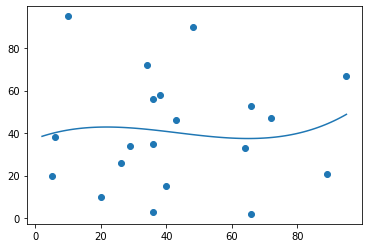

In [2]:
# bad fit
import numpy as np
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x,y,3))

myline = np.linspace(2,95,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

In [4]:
# R-square for bad fit
import numpy as np
import sklearn.metrics as r2_score

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

model = np.poly1d(np.polyfit(x,y,3))


print(r2_score(y, model(x)))

TypeError: 'module' object is not callable

# Hands On Example

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:, 2].values


In [7]:
# splitting dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


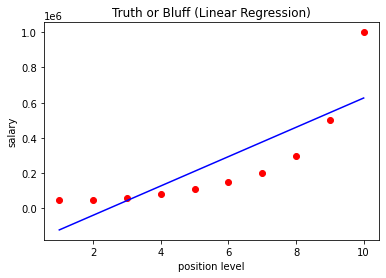

In [8]:
# fitting linear regression to dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg

# Visualing the linear regression results
def viz_linear():
    plt.scatter(X,y,color='red')
    plt.plot(X,lin_reg.predict(X),color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('position level')
    plt.ylabel('salary')
    plt.show()
    return 
viz_linear()

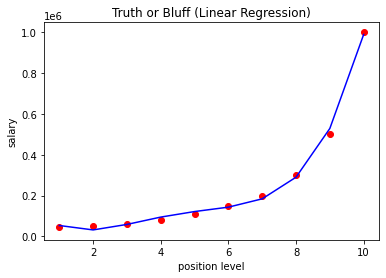

In [11]:
# fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

# visualizing the polynomial regression result
def viz_polynomial():
    plt.scatter(X, y, color='red')
    plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('position level')
    plt.ylabel('salary')
    plt.show()
    return 
viz_polynomial()


In [12]:
# predicting a new result with Linear Regression
pred_linear = lin_reg.predict([[11]])

In [14]:
# predicting a new result with Polynomial Regression
pred_polynomial = pol_reg.predict(poly_reg.fit_transform([[11]]))


In [15]:
print("Linear Regression results             = ", pred_linear)
print("Polynomial Regression results         = ", pred_polynomial)

print("The difference is                     =", pred_polynomial - pred_linear)

Linear Regression results             =  [709872.79843444]
Polynomial Regression results         =  [1780833.33333359]
The difference is                     = [1070960.53489915]
